In [1]:
import numpy as np
import pandas as pd
import shap

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


PATH_PROJECT = "/home/yoshraf/projects/mestrado/"

X_train = pd.read_parquet(f"{PATH_PROJECT}data/counting_trips/X_train_night.parquet")
X_test = pd.read_parquet(f"{PATH_PROJECT}data/counting_trips/X_test_night.parquet")
y_train = pd.read_parquet(f"{PATH_PROJECT}data/counting_trips/y_train_night.parquet")
y_test = pd.read_parquet(f"{PATH_PROJECT}data/counting_trips/y_test_night.parquet")

In [2]:
shap.initjs()

In [3]:
from sklearn.linear_model import LinearRegression


def lr_modeling(X_train, X_test, y_train, y_test):
    reg = LinearRegression()
    reg.fit(X_train, y_train)
    y_pred_train = reg.predict(X_train)
    y_pred_test = reg.predict(X_test)
    valid_model(y_train, y_test, y_pred_train, y_pred_test)
    return reg

lr_modeling(X_train, X_test, y_train, y_test)

NameError: name 'valid_model' is not defined

In [4]:
def valid_model(y_train, y_test, y_pred_train, y_pred_test):
    mae_train = mean_absolute_error(y_train, y_pred_train)
    mse_train = mean_squared_error(y_train, y_pred_train)
    r2_train = r2_score(y_train, y_pred_train)
    mae_test = mean_absolute_error(y_test, y_pred_test)
    mse_test = mean_squared_error(y_test, y_pred_test)
    r2_test = r2_score(y_test, y_pred_test)
    print("----Train---")
    print(f"MAE: {mae_train:.2f}")
    print(f"MSE: {mse_train:.2f}")
    print(f"R2: {r2_train:.2f}")
    print("---- Test ---")
    print(f"MAE: {mae_test:.2f}")
    print(f"MSE: {mse_test:.2f}")
    print(f"R2: {r2_test:.2f}")
    return None

def rf_modeling(X_train, X_test, y_train, y_test, params):
    reg = RandomForestRegressor(**params)
    reg.fit(X_train, y_train.values.ravel())
    y_pred_train = reg.predict(X_train)
    y_pred_test = reg.predict(X_test)
    feats = {}
    for feature, importance in zip(X_train.columns, reg.feature_importances_):
        feats[feature] = importance * 100
    df_imp = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Importance'}).sort_values("Importance", ascending=False)
    print("Main Features:")
    print(df_imp.head(10))
    valid_model(y_train, y_test, y_pred_train, y_pred_test)
    return reg

In [4]:
rf_params = {"n_estimators": 100, "max_depth": 12, "random_state": 0, "min_samples_leaf": 30, "max_features": "auto", "max_samples": .8, "n_jobs": -1}
reg = rf_modeling(X_train, X_test, y_train, y_test, {})

Main Features:
                              Importance
Idade                           8.827052
per Renda familiar mensal       7.992944
loc_domicilio_dist_trem         7.696957
loc_domicilio_dist_term         7.556266
loc_domicilio_dist_ciclo        7.535812
loc_domicilio_dist_metro        7.272268
loc_domicilio_count_parada      7.188788
Estuda atualmente?__outros_     6.276088
Pontos Critério Brasil          5.973156
loc_domicilio_ACC_TI_A_E_60M    3.987921
----Train---
MAE: 0.06
MSE: 0.01
R2: 0.88
---- Test ---
MAE: 0.17
MSE: 0.10
R2: 0.13


In [5]:
rf_params = {"n_estimators": 100, "max_depth": 12, "random_state": 0, "min_samples_leaf": 30, "max_features": "auto", "max_samples": .8, "n_jobs": -1}
reg = rf_modeling(X_train, X_test, y_train, y_test, rf_params)

Main Features:
                                            Importance
Estuda atualmente?__outros_                  24.919992
Idade                                        13.198565
Condição de atividade_Tem Trabalho Regular   12.119369
loc_domicilio_count_parada                   10.489176
loc_domicilio_dist_metro                      4.475600
per Renda familiar mensal                     3.972282
loc_domicilio_dist_term                       3.695456
loc_domicilio_dist_trem                       3.355550
loc_domicilio_dist_ciclo                      3.290979
loc_domicilio_ACC_TI_A_E_60M                  2.812064
----Train---
MAE: 0.16
MSE: 0.09
R2: 0.24
---- Test ---
MAE: 0.16
MSE: 0.09
R2: 0.15


In [6]:
explainer = shap.Explainer(reg)
shap_values = explainer(X_test)

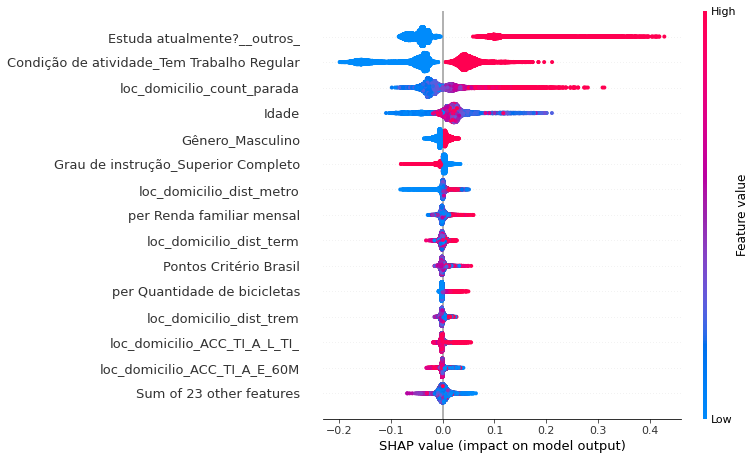

In [7]:
# summarize the effects of all the features
shap.plots.beeswarm(shap_values, max_display=15)

In [48]:
class ShapObject:
    
    def __init__(self, base_values, data, values, feature_names):
        self.base_values = base_values # Single value
        self.data = data # Raw feature values for 1 row of data
        self.values = values # SHAP values for the same row of data
        self.feature_names = feature_names # Column names

In [49]:
y_test["idx"] = np.arange(y_test.shape[0])
y_test.sort_values(by=list(y_test.columns), ascending=False)[:20]

,,,,,Total Motivo Interesse,idx
Identifica pessoa,Zona de domicílio,Data da entrevista,Coordenada X domicílio,Coordenada Y domicílio,,
00750498101,75.0,26092018,330913.0,7392548.0,5,15672
00250035101,25.0,19082017,331586.0,7394021.0,5,2449
02200010103,220.0,07042018,350538.0,7394838.0,4,13302
00920355101,92.0,29032018,329848.0,7397575.0,4,10915
03401003101,340.0,05062018,325603.0,7392933.0,4,8785
02680089101,268.0,22052018,328242.0,7386312.0,4,2642
00920331101,92.0,18112017,329831.0,7397603.0,3,15838
01340050101,134.0,24082017,333905.0,7401519.0,3,14987
01440006101,144.0,21112017,331609.0,7403283.0,3,14757


Total Motivo Interesse        5
idx                       15672
Name: (00750498101, 75.0, 26092018, 330913.0, 7392548.0), dtype: int64


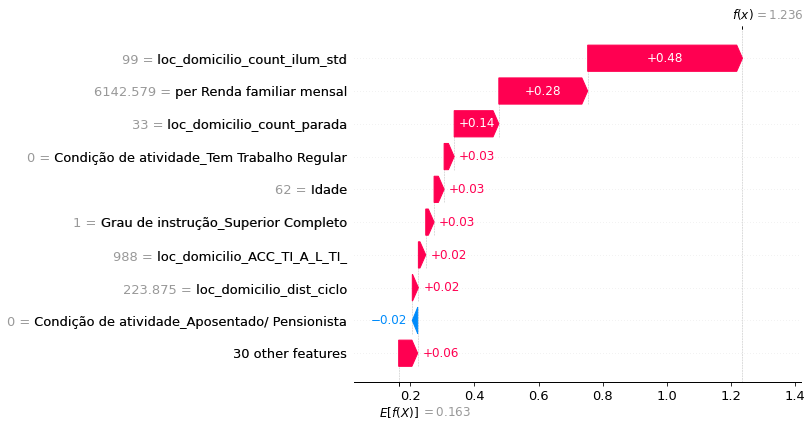

In [50]:
row = 15672
shap_object = ShapObject(base_values = shap_values[row].base_values[0],
                         values = shap_values[row].values,
                         feature_names = X_test.columns,
                         data = X_test.iloc[row])
print(y_test.iloc[row])
shap.waterfall_plot(shap_object)

Total Motivo Interesse        3
idx                       11888
Name: (00510491101, 51.0, 21082018, 334092.0, 7390592.0), dtype: int64


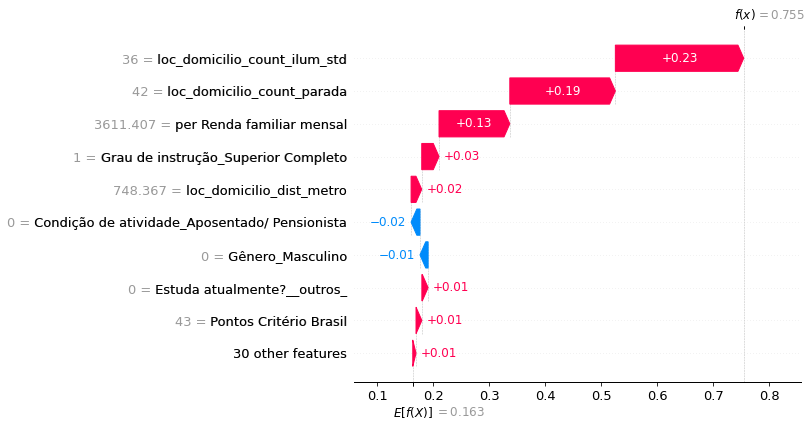

In [52]:
row = 11888
shap_object = ShapObject(base_values = shap_values[row].base_values[0],
                         values = shap_values[row].values,
                         feature_names = X_test.columns,
                         data = X_test.iloc[row])
print(y_test.iloc[row])
shap.waterfall_plot(shap_object)

Total Motivo Interesse     0
idx                       42
Name: (02030419102, 203.0, 16032018, 354669.0, 7396730.0), dtype: int64


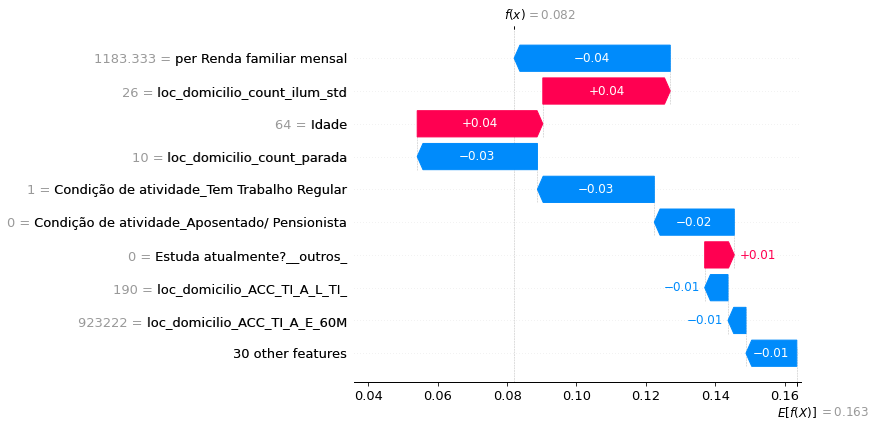

In [53]:
row = 42
shap_object = ShapObject(base_values = shap_values[row].base_values[0],
                         values = shap_values[row].values,
                         feature_names = X_test.columns,
                         data = X_test.iloc[row])
print(y_test.iloc[row])
shap.waterfall_plot(shap_object)